In [61]:
import pandas as pd
import numpy as np
from pathlib import Path
from corpus_processing import PROCESSED_DATA_PATH_PICKLE, DATA_PATH
import re

In [62]:
ONLY_WORDS_AND_DIGITS_REGEX = re.compile(r'[\w\dא-ת]+')
def get_only_words_and_digits(text: str):
    return ONLY_WORDS_AND_DIGITS_REGEX.findall(text)

def text_to_word_list(text: str):
    return get_only_words_and_digits(text)
    #return text.split()

In [63]:
data_frame = pd.read_pickle(PROCESSED_DATA_PATH_PICKLE)
authors_data_frame = data_frame.authors.value_counts().to_frame(name="songs_count")
sentence_count = []
words_count = []
for author in authors_data_frame.index:
    current_author_df = data_frame.loc[data_frame.authors == author]
    current_author_sentence_count = []
    current_author_words_count = []
    for index, row in current_author_df.iterrows():
        current_author_sentence_count.append(len(row.content_sep))
        current_author_words_count.append(len(text_to_word_list(row.content)))
    sentence_count.append(np.array(current_author_sentence_count))
    words_count.append(np.array(current_author_words_count))

authors_data_frame["sentence_count"] = sentence_count
authors_data_frame["words_count"] = words_count

authors_data_frame.head()
# authors = set(data_frame.authors)
# print(len(authors))

,songs_count,sentence_count,words_count
אברהם אבן עזרא,668,"[8, 9, 6, 7, 5, 1, 7, 6, 9, 1, 6, 8, 5, 4, 8, ...","[96, 100, 73, 43, 65, 16, 257, 69, 129, 40, 72..."
שמואל הנגיד,630,"[1, 1, 19, 1, 26, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1...","[21, 28, 548, 17, 750, 234, 45, 15, 21, 36, 24..."
שלמה אבן גבירול,627,"[3, 0, 4, 1, 14, 2, 0, 1, 7, 8, 1, 5, 2, 1, 24...","[30, 50, 48, 53, 353, 35, 139, 132, 49, 90, 90..."
יהודה הלוי,542,"[1, 1, 9, 17, 8, 1, 3, 21, 3, 17, 1, 1, 1, 6, ...","[150, 221, 78, 219, 89, 109, 40, 203, 71, 218,..."
יהודה קרני,470,"[13, 1, 6, 2, 5, 3, 3, 3, 2, 6, 2, 1, 4, 3, 2,...","[204, 23, 70, 70, 71, 84, 53, 45, 52, 54, 45, ..."


In [64]:
#combine with data from wikipedia
AUTHORS_DATA_PATH = DATA_PATH / Path("authors_processed/authors.csv")
authors_data_frame = authors_data_frame.join(pd.read_csv(AUTHORS_DATA_PATH).set_index('name'), how='left')

authors_data_frame.head()

,songs_count,sentence_count,words_count,id,sex,p_birth,p_death,d_birth,d_death,Hebrew Speaker
אברהם אבן עזרא,668,"[8, 9, 6, 7, 5, 1, 7, 6, 9, 1, 6, 8, 5, 4, 8, ...","[96, 100, 73, 43, 65, 16, 257, 69, 129, 40, 72...",46,male,Tudela,Tudela,1089-01-01,1167-10-15,NaN
שמואל הנגיד,630,"[1, 1, 19, 1, 26, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1...","[21, 28, 548, 17, 750, 234, 45, 15, 21, 36, 24...",32,male,C?rdoba,Granada,0933-06-09,1055-06-09,NaN
שלמה אבן גבירול,627,"[3, 0, 4, 1, 14, 2, 0, 1, 7, 8, 1, 5, 2, 1, 24...","[30, 50, 48, 53, 353, 35, 139, 132, 49, 90, 90...",40,male,M?laga,Valencia,1021-01-01,11/18/1057,NaN
יהודה הלוי,542,"[1, 1, 9, 17, 8, 1, 3, 21, 3, 17, 1, 1, 1, 6, ...","[150, 221, 78, 219, 89, 109, 40, 203, 71, 218,...",26,male,Tudela,Jerusalem,1079-01-01,1141-01-01,NaN
יהודה קרני,470,"[13, 1, 6, 2, 5, 3, 3, 3, 2, 6, 2, 1, 4, 3, 2,...","[204, 23, 70, 70, 71, 84, 53, 45, 52, 54, 45, ...",332,male,Pinsk,Tel Aviv,1884-01-01,1949-01-03,NaN


## authors statistics

In [65]:
authors_data_frame["sentence_total"] = authors_data_frame.sentence_count.apply(sum)
authors_data_frame["sentence_mean"] = authors_data_frame.sentence_count.apply(np.mean)

authors_data_frame["words_total"] = authors_data_frame.words_count.apply(sum)
authors_data_frame["words_mean"] = authors_data_frame.words_count.apply(np.mean)

authors_data_frame.sort_values(by=["words_total"], ascending=False, inplace=True)
authors_data_frame.head()

,songs_count,sentence_count,words_count,id,sex,p_birth,p_death,d_birth,d_death,Hebrew Speaker,sentence_total,sentence_mean,words_total,words_mean
הומרוס,3,"[205, 5246, 4474]","[4638, 116224, 89755]",195,male,Smyrna$$$$$$$$1 reference$$$$$$stated in$$$$$F...,Ios$$$$$$$$1 reference$$$$$$imported from Wiki...,0000-08-05,0000-08-05,False,9925,3308.333333,210617,70205.666667
שאול טשרניחובסקי,277,"[7, 6, 20, 6, 6, 6, 11, 4, 7, 16, 25, 56, 8, 1...","[131, 61, 262, 81, 82, 166, 229, 156, 136, 224...",16,male,Mykhailivka,Jerusalem,1875-08-20,1943-10-14,NaN,8743,31.563177,146398,528.512635
עמנואל הרומי,21,"[26, 0, 39, 0, 18, 13, 13, 13, 13, 317, 35, 63...","[5222, 13015, 4448, 3105, 3729, 6217, 6217, 62...",107,male,Rome,Fermo,1260-01-01,1328-01-01,NaN,858,40.857143,101764,4845.904762
שלמה אבן גבירול,627,"[3, 0, 4, 1, 14, 2, 0, 1, 7, 8, 1, 5, 2, 1, 24...","[30, 50, 48, 53, 353, 35, 139, 132, 49, 90, 90...",40,male,M?laga,Valencia,1021-01-01,11/18/1057,NaN,2448,3.904306,96081,153.239234
אברהם אבן עזרא,668,"[8, 9, 6, 7, 5, 1, 7, 6, 9, 1, 6, 8, 5, 4, 8, ...","[96, 100, 73, 43, 65, 16, 257, 69, 129, 40, 72...",46,male,Tudela,Tudela,1089-01-01,1167-10-15,NaN,6026,9.020958,80577,120.624251


<AxesSubplot:title={'center':'words per author'}>

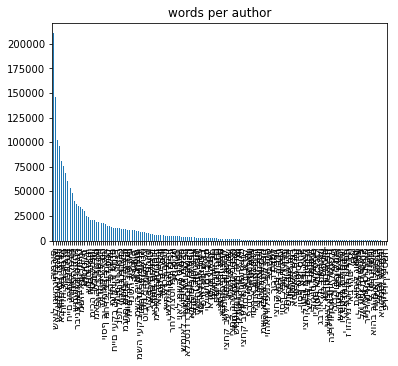

In [66]:
authors_data_frame.words_total.plot.bar(title="words per author")

<AxesSubplot:title={'center':'sentences per author'}>

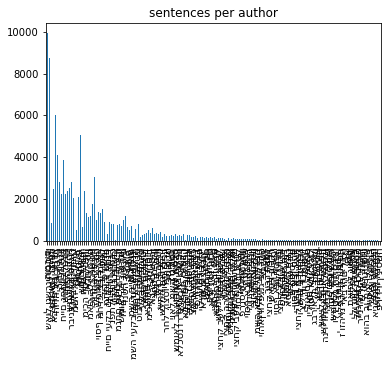

In [67]:
authors_data_frame.sentence_total.plot.bar(title="sentences per author")

In [68]:
N=25

total_songs = authors_data_frame.songs_count.sum()
top_authors = authors_data_frame.iloc[:N]
print(f"from {total_songs} songs, the top {N} give {top_authors.songs_count.sum()}.\n"
      f"That is {top_authors.songs_count.sum() / total_songs}\n")
top_authors_b_day = top_authors.d_birth.apply(lambda x:x if type(x) != str else int(x.split('-')[0]))
top_authors_b_day

from 7022 songs, the top 25 give 5081.
That is 0.7235830247792652



הומרוס                 0.0
שאול טשרניחובסקי    1875.0
עמנואל הרומי        1260.0
שלמה אבן גבירול     1021.0
אברהם אבן עזרא      1089.0
יהודה ליב גורדון    1830.0
יהודה הלוי          1079.0
ג'ון מילטון         1608.0
חיים נחמן ביאליק    1873.0
שמואל הנגיד          933.0
יהודה קרני          1884.0
שמעון גינצבורג      1890.0
רבינדראנאת טאגור    1861.0
יעקב שטיינברג       1887.0
משה אבן עזרא        1060.0
אלמוני/ת               NaN
אל-חרירי            1054.0
שלום שבזי           1619.0
חיים לנסקי          1905.0
מיכה יוסף לבנזון    1828.0
אלתר לוין           1883.0
מאיר הלוי לטריס     1800.0
פניה ברגשטיין       1908.0
יהודה אלחריזי       1165.0
יעקב לרנר           1879.0
Name: d_birth, dtype: float64

In [69]:
# save data
output_dir = DATA_PATH / Path("authors_processed")

authors_data_frame.drop(columns=['sentence_count', 'words_count']).to_csv(output_dir / Path("authors_stats.csv"), encoding="utf-8")
authors_data_frame.to_pickle(output_dir / Path("authors_stats.pkl.gz"), compression='gzip')